In [ ]:
#Importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Lendo os arquivos em binário

In [86]:
#Lendo arquivos binários
with open ("alo.pcm", "rb") as f:
        fid = f.read()
        f.close()
entrada = np.frombuffer(fid, dtype = "int16")

In [ ]:
#declaração de variaveis

In [87]:
Fs = 8000 
t1 = 10 * 10**-3 
t2 = 15 * 10**-3
n = [int(t1 * Fs), int(t2 * Fs), 0] 
# Ganhos
a = [.5, .3, .2]
delay_length = n[2]
vector_eco = np.zeros(len(entrada), dtype = "int16");

# Entradas
saida = np.copy(entrada)

In [ ]:
#formula para calcular o eco
#Laço de repetição que possui o tamanho do array de entrada
#salva o resultado do calculo em um vetor de saida

In [88]:
for i in range(len(a)):
    for j in range(len(entrada)):
        vector_eco[j] = a[i] * entrada[j]
        
        np.concatenate([saida, np.zeros(n[i], dtype = "int16")])
        
    saida = np.concatenate([saida, vector_eco])

In [ ]:
#Plotando o gráfico de entrada

<StemContainer object of 3 artists>

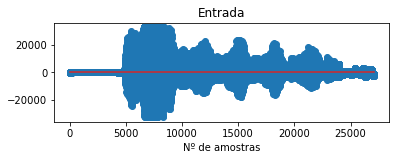

In [89]:
plt.subplot(2, 1, 1)
plt.title("Entrada")
plt.xlabel("Nº de amostras")
plt.stem(entrada)

In [ ]:
#Plotando o grafico de saida

<StemContainer object of 3 artists>

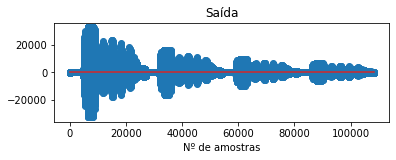

In [90]:
plt.subplot(2, 1, 2)
plt.title("Saída")
plt.xlabel("Nº de amostras")
plt.stem(saida)

In [ ]:
#Salvando o arquivo eco

In [91]:
with open('eco.pcm', 'wb') as fid:
    np.array(saida, dtype=np.int16).tofile(fid)
fid.close()